# Keras intro exercises

## 1. Build a simple sequential model

* Can you build a sequential model to reproduce the graph shown in the figure? 
* Assume that this is a classifier
* Choose whatever activations you want, wherever possible
* How many classes are we predicting?

<center><img src="figures/sequence_api_exercise.png"></center>

In [67]:
#!wget https://raw.githubusercontent.com/NBISweden/workshop-neural-nets-and-deep-learning/master/session_annBuildingBlocks/lab_keras/exercises.ipynb
!mkdir figures
!wget -P figures/ https://raw.githubusercontent.com/NBISweden/workshop-neural-nets-and-deep-learning/master/session_annBuildingBlocks/lab_keras/figures/sequence_api_exercise.png

mkdir: cannot create directory ‘figures’: File exists
--2024-05-21 11:41:53--  https://raw.githubusercontent.com/NBISweden/workshop-neural-nets-and-deep-learning/master/session_annBuildingBlocks/lab_keras/figures/sequence_api_exercise.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27270 (27K) [image/png]
Saving to: ‘figures/sequence_api_exercise.png.1’

sequence_api_exerci 100%[===================>]  26.63K  --.-KB/s    in 0.002s  

2024-05-21 11:41:53 (14.9 MB/s) - ‘figures/sequence_api_exercise.png.1’ saved [27270/27270]



In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# feature number is 256
model.add(Dense(units=64, activation='relu', input_dim=256, name="Dense")) # input: batch (==1 in this case) [n * 256] × [ 256 * 64 ] # + 64 bias
model.add(Dense(units=32, activation='relu', name="dense_1")) # input:  [ n * 64 ] × [ 64 * 32 ] # + 32 bias
model.add(Dense(units=10, activation='softmax', name="dense_2")) # input: [ 64 * 32 ] × [32 * 10 ] # + 10 bias
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 18,858
Trainable params: 18,858
Non-trainable params: 0
_________________________________________________________________


In [70]:
model_regression = Sequential()
model_regression.add(Dense(10, activation="relu", input_dim=13))
model_regression.add(Dense(4, activation="relu"))
# model_regression.add(Dense(1, activation="linear"))
model_regression.add(Dense(1, activation=None)) # equals to activation=linear
model_regression.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_58 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 5         
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


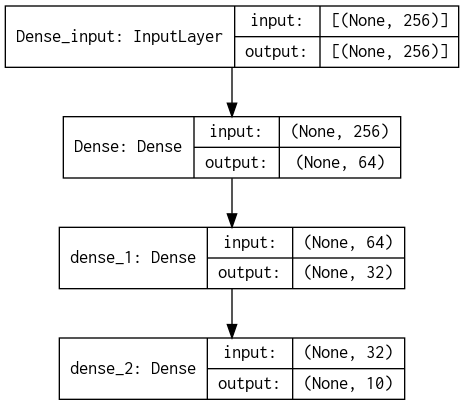

In [71]:
from tensorflow.keras.utils import plot_model

#Add your model here

plot_model(model, "figures/exercise_model.png", show_shapes=True)

## 2. Build a better XOR classifier

Given the model seen at lecture, how do we make a better classifier (higher accuracy)?

* More layers? More neurons?
* Generate more data?
* More epochs?
* Different batch size?
* Different optimizer?
* It's up to you! Let's see who does best on validation

Only for Tuesday's session:

* Different activations?
* Add Dropout? How large?

Training curve plotting function:

In [72]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_loss_acc(history):
    try:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
    except:
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train acc', 'val acc', 'train loss', 'val loss'], loc='upper left')
    plt.show()

Data generation step:

In [73]:
# Generate XOR data
data = np.random.random((10000, 3)) - 0.5
labels = np.zeros((10000, 1))

# xor 一真一假 异或判断
labels[np.where(np.logical_xor(np.logical_xor(data[:,0] > 0, data[:,1] > 0), data[:,2] > 0))] = 1

#let's print some data and the corresponding label to check that they match the table above
for x in range(3):
    print("{0: .2f} xor {1: .2f} xor {2: .2f} equals {3:}".format(data[x,0], data[x,1], data[x,2], labels[x,0]))

-0.26 xor  0.02 xor -0.46 equals 1.0
-0.23 xor  0.16 xor -0.12 equals 1.0
 0.41 xor  0.43 xor -0.41 equals 0.0


In [74]:
n_slice = 2
print(data[n_slice,...])
print(labels[n_slice,...])

[ 0.41056421  0.42880976 -0.40996585]
[0.]



The baseline network to improve:

In [75]:
model = Sequential()
model.add(Dense(units=10, activation='tanh', input_dim=3))
model.add(Dense(units=4, activation='tanh'))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='adam', # Defaults to 0.001
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] # matrix 就是之后打印用的，不会影响模型训练
              )

# Train the model, iterating on the data in batches of 128 samples
history = model.fit(data, labels, epochs=30, batch_size=128, validation_split=0.1)

Epoch 1/30
71/71 [==============================] - 2s 20ms/step - loss: 0.7015 - accuracy: 0.6084 - val_loss: 0.6898 - val_accuracy: 0.6550
Epoch 2/30
71/71 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.6104 - val_loss: 0.6889 - val_accuracy: 0.6150
Epoch 3/30
71/71 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5552 - val_loss: 0.6903 - val_accuracy: 0.6310
Epoch 4/30
71/71 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.6138 - val_loss: 0.6894 - val_accuracy: 0.6210
Epoch 5/30
71/71 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.6080 - val_loss: 0.6889 - val_accuracy: 0.6210
Epoch 6/30
71/71 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5625 - val_loss: 0.6891 - val_accuracy: 0.6120
Epoch 7/30
71/71 [==============================] - 0s 7ms/step - loss: 0.6894 - accuracy: 0.5785 - val_loss: 0.6869 - val_accuracy: 0.6030
Epoch 8/30
71/71 [=

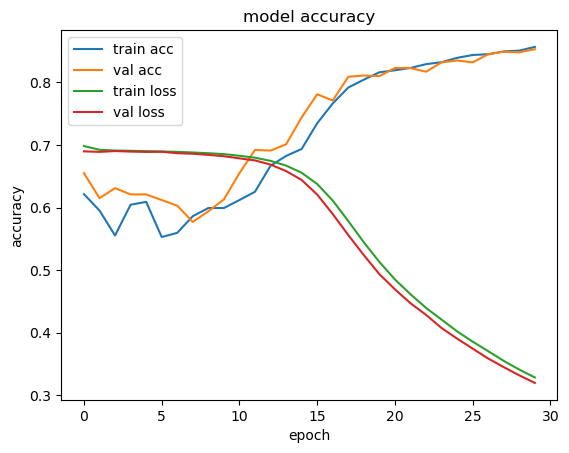

In [76]:
plot_loss_acc(history)

In [77]:
# smaller batch size --
model_test = Sequential()
model_test.add(Dense(units=10, activation='tanh', input_dim=3))
model_test.add(Dense(units=4, activation='tanh'))
model_test.add(Dense(units=2, activation='softmax'))

model_test.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] # matrix 就是之后打印用的，不会影响模型训练
              )

# Train the model, iterating on the data in batches of 64 samples
history2 = model_test.fit(data, labels, epochs=30, batch_size=64, validation_split=0.7)
plot_loss_acc(history2)


Epoch 1/30
14/47 [=======>......................] - ETA: 0s - loss: 0.7146 - accuracy: 0.5072

KeyboardInterrupt: 

Epoch 1/30
47/47 [==============================] - 1s 12ms/step - loss: 0.7247 - accuracy: 0.5984 - val_loss: 0.6994 - val_accuracy: 0.6076
Epoch 2/30
47/47 [==============================] - 0s 8ms/step - loss: 0.6975 - accuracy: 0.5795 - val_loss: 0.6902 - val_accuracy: 0.5721
Epoch 3/30
47/47 [==============================] - 0s 9ms/step - loss: 0.6898 - accuracy: 0.5577 - val_loss: 0.6870 - val_accuracy: 0.5190
Epoch 4/30
47/47 [==============================] - 1s 11ms/step - loss: 0.6852 - accuracy: 0.5228 - val_loss: 0.6852 - val_accuracy: 0.5286
Epoch 5/30
47/47 [==============================] - 0s 9ms/step - loss: 0.6834 - accuracy: 0.5297 - val_loss: 0.6827 - val_accuracy: 0.5430
Epoch 6/30
47/47 [==============================] - 0s 8ms/step - loss: 0.6840 - accuracy: 0.5498 - val_loss: 0.6789 - val_accuracy: 0.5501
Epoch 7/30
47/47 [==============================] - 0s 10ms/step - loss: 0.6784 - accuracy: 0.5600 - val_loss: 0.6745 - val_accuracy: 0.5826
Epoch 8/30
47/47 

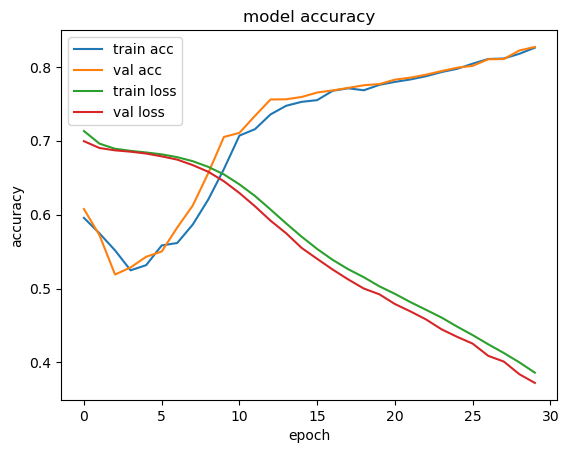

In [ ]:
# add hidden layer ++

model_test = Sequential()
model_test.add(Dense(units=10, activation='tanh', input_dim=3))
model_test.add(Dense(units=4, activation='tanh'))
model_test.add(Dense(units=3, activation='tanh'))
model_test.add(Dense(units=2, activation='softmax'))

model_test.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] 
              )

# Train the model, iterating on the data in batches of 64 samples
history2 = model_test.fit(data, labels, epochs=30, batch_size=64, validation_split=0.7)
plot_loss_acc(history2)


Epoch 1/30
47/47 [==============================] - 1s 16ms/step - loss: 0.6894 - accuracy: 0.5386 - val_loss: 0.6384 - val_accuracy: 0.6459
Epoch 2/30
47/47 [==============================] - 1s 14ms/step - loss: 0.6022 - accuracy: 0.6853 - val_loss: 0.6018 - val_accuracy: 0.6977
Epoch 3/30
47/47 [==============================] - 0s 6ms/step - loss: 0.5637 - accuracy: 0.7254 - val_loss: 0.4523 - val_accuracy: 0.7950
Epoch 4/30
47/47 [==============================] - 0s 7ms/step - loss: 0.3687 - accuracy: 0.8377 - val_loss: 0.2129 - val_accuracy: 0.9020
Epoch 5/30
47/47 [==============================] - 0s 5ms/step - loss: 0.2449 - accuracy: 0.8897 - val_loss: 0.2002 - val_accuracy: 0.8997
Epoch 6/30
47/47 [==============================] - 0s 6ms/step - loss: 0.2074 - accuracy: 0.9040 - val_loss: 0.1578 - val_accuracy: 0.9303
Epoch 7/30
47/47 [==============================] - 0s 6ms/step - loss: 0.1558 - accuracy: 0.9316 - val_loss: 0.2092 - val_accuracy: 0.9144
Epoch 8/30
47/47 [

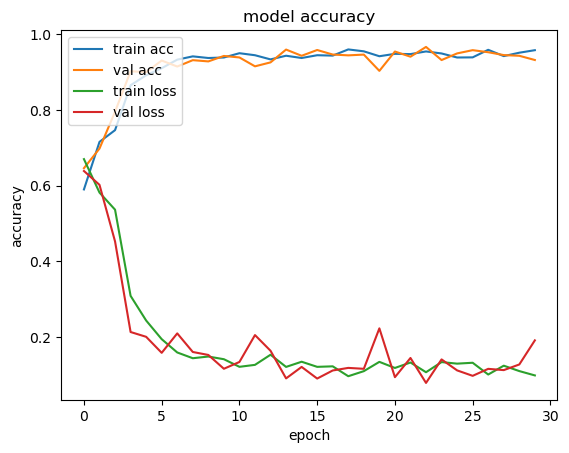

In [ ]:
# increase learning rate ++
from tensorflow import keras

model_test = Sequential()
model_test.add(Dense(units=10, activation='tanh', input_dim=3))
model_test.add(Dense(units=4, activation='tanh'))
model_test.add(Dense(units=2, activation='softmax'))

model_test.compile(optimizer=keras.optimizers.Adam(0.1),  # high learning rate
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] 
              )

# Train the model, iterating on the data in batches of 64 samples
history2 = model_test.fit(data, labels, epochs=30, batch_size=64, validation_split=0.7)
plot_loss_acc(history2)


## 3. Build a regression model

* Take the Boston housing dataset (http://lib.stat.cmu.edu/datasets/boston)
* Records a set of variables for a set of houses in Boston, including among others:
    * CRIM     per capita crime rate by town
    * ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    * INDUS    proportion of non-retail business acres per town
    * CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    * NOX      nitric oxides concentration (parts per 10 million)
    * RM       average number of rooms per dwelling
* Can we use these variables to predict the value of a house (in tens of thousands of dollars)?

In [ ]:
import tensorflow
from sklearn.preprocessing import StandardScaler 
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [83]:
%matplotlib inline

import matplotlib.pyplot as plt
import inspect

def get_variable_name(name_v):
    # Get the frame of the caller
    frame = inspect.currentframe().f_back
    # Get the caller's local variables
    caller_locals = frame.f_locals
    # Find the variable name in the caller's local scope
    variable_name = 'None'
    for name, val in caller_locals.items():
        if val is name_v:
            variable_name = name
            break
    return variable_name

def plot_loss_mae(history, metric,title):
    
    fig,ax = plt.subplots()
    ax.plot(history.history[metric])
    ax.plot(history.history['val_' + metric])
    ax.set_ylabel(metric)
    ax2=ax.twinx()
    ax2.plot(history.history['loss'], c="red")
    ax2.plot(history.history['val_loss'], c="green")
    ax2.set_ylabel("loss")
    plt.title('model accuracy'+' '+title)
    #plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train ' + metric, 'val ' + metric, 'train loss', 'val loss'], loc='upper left')
    plt.show()

In [84]:
#This is how we load the dataset, pre-split in training/validation sets
(X_train, y_train), (X_val, y_val) = tensorflow.keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113)

#Let's have a look at the data
print(X_train.shape)
print(X_train[0], y_train[0])

# 标准化特征: 去除均值并缩放至单位方差
# u -- mean, s -- standard deviation
# z = (x - u) / s
scaler = StandardScaler()
scaler.fit(X_train) # calculate u,s
X_train_s = scaler.transform(X_train) # calculate z
X_val_s = scaler.transform(X_val) # calculate z
print(X_train_s.shape)
print(X_train_s[0], y_train[0])

# out puts are all positive
print('output >0: ',np.sum(y_train > 0),np.sum(y_val > 0))



(404, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2
(404, 13)
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ] 15.2
output >0:  404 102


In [85]:
# regression model mae
model = Sequential()
model.add(Dense(10, activation="relu", input_dim=13))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(optimizer='adam',                    
              loss='mean_absolute_error', 
              metrics=["mean_absolute_error"]) 
print(model.optimizer.get_config())
model.summary()


{'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_70 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 5         
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
26/26 [==============================] - 1s 16ms/step - loss: 21.6885 - mean_absolute_error: 21.6885 - val_loss: 22.0434 - val_mean_absolute_error: 22.0434
Epoch 2/20
26/26 [==============================] - 0s 8ms/step - loss: 20.6557 - mean_absolute_error: 20.6557 - val_loss: 21.6170 - val_mean_absolute_error: 21.6170
Epoch 3/20
26/26 [==============================] - 0s 10ms/step - loss: 20.9125 - mean_absolute_error: 20.9125 - val_loss: 21.0649 - val_mean_absolute_error: 21.0649
Epoch 4/20
26/26 [==============================] - 0s 15ms/step - loss: 20.0168 - mean_absolute_error: 20.0168 - val_loss: 20.3579 - val_mean_absolute_error: 20.3579
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 21.1696 - mean_absolute_error: 21.1696 - val_loss: 19.4425 - val_mean_absolute_error: 19.4425
Epoch 6/20
26/26 [==============================] - 1s 21ms/step - loss: 18.2522 - mean_absolute_error: 18.2522 - val_loss: 18.2672 - val_mean_absolute_error: 18.2672


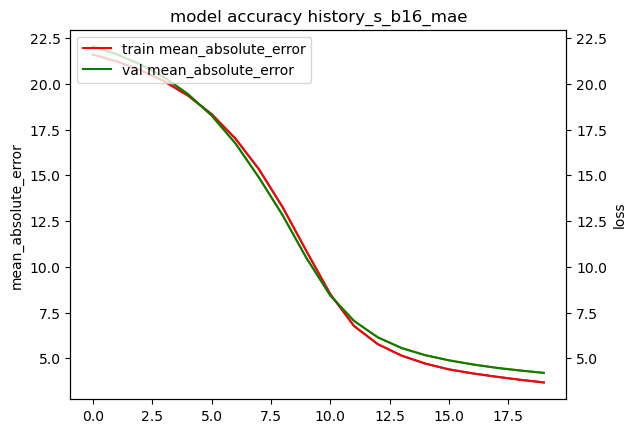

In [86]:
# regression with StandardScaler
history_s_b16_mae = model.fit(X_train_s, y_train, batch_size=16, epochs=20, validation_data=(X_val_s, y_val))
plot_loss_mae(history_s_b16_mae, "mean_absolute_error",'history_s_b16_mae')

Epoch 1/20
26/26 [==============================] - 0s 12ms/step - loss: 1874.5792 - mean_absolute_error: 1874.5792 - val_loss: 1254.1635 - val_mean_absolute_error: 1254.1635
Epoch 2/20
26/26 [==============================] - 0s 9ms/step - loss: 903.1772 - mean_absolute_error: 903.1772 - val_loss: 657.2290 - val_mean_absolute_error: 657.2290
Epoch 3/20
26/26 [==============================] - 1s 23ms/step - loss: 499.8666 - mean_absolute_error: 499.8666 - val_loss: 383.7518 - val_mean_absolute_error: 383.7518
Epoch 4/20
26/26 [==============================] - 0s 10ms/step - loss: 295.3681 - mean_absolute_error: 295.3681 - val_loss: 223.2301 - val_mean_absolute_error: 223.2301
Epoch 5/20
26/26 [==============================] - 0s 9ms/step - loss: 168.0688 - mean_absolute_error: 168.0688 - val_loss: 118.3456 - val_mean_absolute_error: 118.3456
Epoch 6/20
26/26 [==============================] - 0s 10ms/step - loss: 86.9485 - mean_absolute_error: 86.9485 - val_loss: 58.0258 - val_mean_

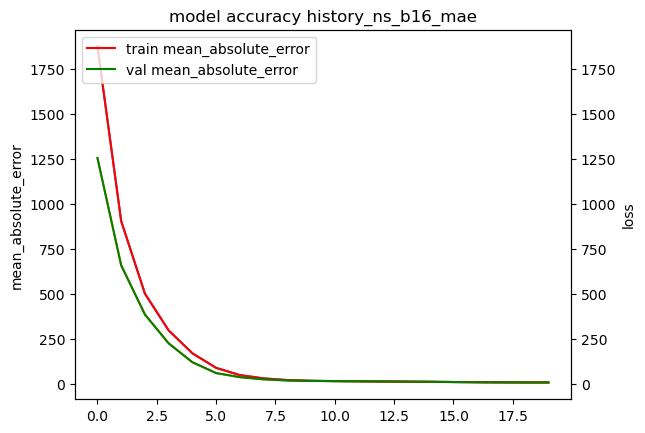

In [87]:
# regression without StandardScaler mae ++
history_ns_b16_mae = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_val, y_val))
plot_loss_mae(history_ns_b16_mae, "mean_absolute_error",'history_ns_b16_mae')

In [92]:
# regression model mse
model = Sequential()
model.add(Dense(10, activation="relu", input_dim=13))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(optimizer='adam',                    
              loss='mean_squared_error', 
              metrics=["mean_squared_error"]) 
print(model.optimizer.get_config())
model.summary()


{'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_79 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 5         
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
26/26 [==============================] - 1s 11ms/step - loss: 2802.7696 - mean_squared_error: 2802.7696 - val_loss: 1413.5956 - val_mean_squared_error: 1413.5956
Epoch 2/20
26/26 [==============================] - 0s 5ms/step - loss: 1182.2159 - mean_squared_error: 1182.2159 - val_loss: 805.5633 - val_mean_squared_error: 805.5633
Epoch 3/20
26/26 [==============================] - 0s 6ms/step - loss: 737.6717 - mean_squared_error: 737.6717 - val_loss: 541.1505 - val_mean_squared_error: 541.1505
Epoch 4/20
26/26 [==============================] - 0s 8ms/step - loss: 559.4972 - mean_squared_error: 559.4972 - val_loss: 361.3703 - val_mean_squared_error: 361.3703
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 404.2645 - mean_squared_error: 404.2645 - val_loss: 248.3234 - val_mean_squared_error: 248.3234
Epoch 6/20
26/26 [==============================] - 0s 7ms/step - loss: 253.2945 - mean_squared_error: 253.2945 - val_loss: 186.5546 - val_mean_squared_e

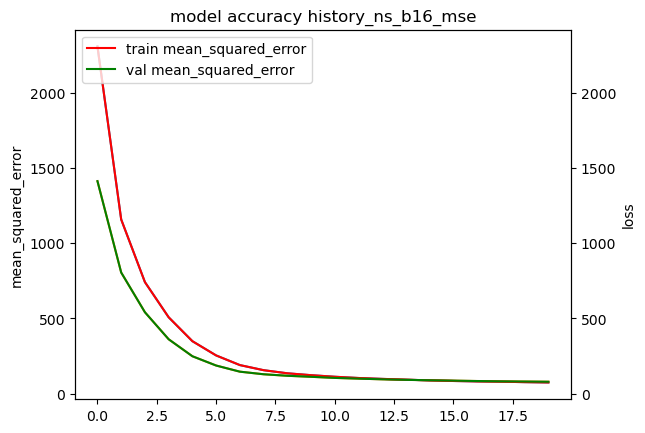

In [93]:
# regression without StandardScaler
history_ns_b16_mse = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_val, y_val))
plot_loss_mae(history_ns_b16_mse, "mean_squared_error",'history_ns_b16_mse')

{'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 32)                448       
_________________________________________________________________
dense_149 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_150 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_151 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 5         
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
____________________________________________________________

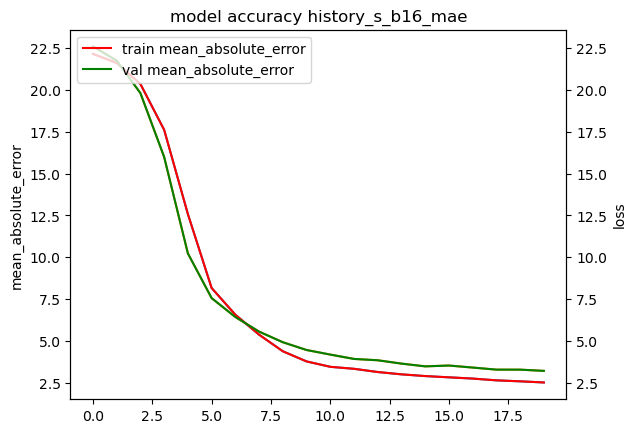

In [110]:
# feature scaled + more layer +mae
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation="relu", input_dim=13))
model.add(Dense(16, activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
# model.add(Dropout(0.2)) # not nice
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(optimizer='adam',                    
              loss='mean_absolute_error', 
              metrics=["mean_absolute_error"]) 
print(model.optimizer.get_config())
model.summary()


# regression without StandardScaler
history_s_b16_mae = model.fit(X_train_s, y_train, batch_size=16, epochs=20, validation_data=(X_val_s, y_val))
plot_loss_mae(history_s_b16_mae, "mean_absolute_error",'history_s_b16_mae')

# Keras intro exercises

## 1. Build a simple sequential model

* Can you build a sequential model to reproduce the graph shown in the figure? 
* Assume that this is a classifier
* Choose whatever activations you want, wherever possible
* How many classes are we predicting?

<center><img src="figures/sequence_api_exercise.png"></center>

In [ ]:
#!wget https://raw.githubusercontent.com/NBISweden/workshop-neural-nets-and-deep-learning/master/session_annBuildingBlocks/lab_keras/exercises.ipynb
!mkdir figures
!wget -P figures/ https://raw.githubusercontent.com/NBISweden/workshop-neural-nets-and-deep-learning/master/session_annBuildingBlocks/lab_keras/figures/sequence_api_exercise.png

mkdir: cannot create directory ‘figures’: File exists
--2024-05-21 11:41:53--  https://raw.githubusercontent.com/NBISweden/workshop-neural-nets-and-deep-learning/master/session_annBuildingBlocks/lab_keras/figures/sequence_api_exercise.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27270 (27K) [image/png]
Saving to: ‘figures/sequence_api_exercise.png.1’

sequence_api_exerci 100%[===================>]  26.63K  --.-KB/s    in 0.002s  

2024-05-21 11:41:53 (14.9 MB/s) - ‘figures/sequence_api_exercise.png.1’ saved [27270/27270]



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# feature number is 256
model.add(Dense(units=64, activation='relu', input_dim=256, name="Dense")) # input: batch (==1 in this case) [n * 256] × [ 256 * 64 ] # + 64 bias
model.add(Dense(units=32, activation='relu', name="dense_1")) # input:  [ n * 64 ] × [ 64 * 32 ] # + 32 bias
model.add(Dense(units=10, activation='softmax', name="dense_2")) # input: [ 64 * 32 ] × [32 * 10 ] # + 10 bias
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 18,858
Trainable params: 18,858
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_regression = Sequential()
model_regression.add(Dense(10, activation="relu", input_dim=13))
model_regression.add(Dense(4, activation="relu"))
# model_regression.add(Dense(1, activation="linear"))
model_regression.add(Dense(1, activation=None)) # equals to activation=linear
model_regression.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_58 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 5         
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


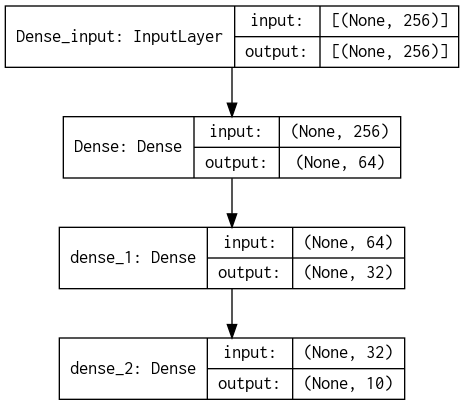

In [ ]:
from tensorflow.keras.utils import plot_model

#Add your model here

plot_model(model, "figures/exercise_model.png", show_shapes=True)

## 2. Build a better XOR classifier

Given the model seen at lecture, how do we make a better classifier (higher accuracy)?

* More layers? More neurons?
* Generate more data?
* More epochs?
* Different batch size?
* Different optimizer?
* It's up to you! Let's see who does best on validation

Only for Tuesday's session:

* Different activations?
* Add Dropout? How large?

Training curve plotting function:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_loss_acc(history):
    try:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
    except:
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train acc', 'val acc', 'train loss', 'val loss'], loc='upper left')
    plt.show()

Data generation step:

In [ ]:
# Generate XOR data
data = np.random.random((10000, 3)) - 0.5
labels = np.zeros((10000, 1))

# xor 一真一假 异或判断
labels[np.where(np.logical_xor(np.logical_xor(data[:,0] > 0, data[:,1] > 0), data[:,2] > 0))] = 1

#let's print some data and the corresponding label to check that they match the table above
for x in range(3):
    print("{0: .2f} xor {1: .2f} xor {2: .2f} equals {3:}".format(data[x,0], data[x,1], data[x,2], labels[x,0]))

-0.26 xor  0.02 xor -0.46 equals 1.0
-0.23 xor  0.16 xor -0.12 equals 1.0
 0.41 xor  0.43 xor -0.41 equals 0.0


In [ ]:
n_slice = 2
print(data[n_slice,...])
print(labels[n_slice,...])

[ 0.41056421  0.42880976 -0.40996585]
[0.]



The baseline network to improve:

In [ ]:
model = Sequential()
model.add(Dense(units=10, activation='tanh', input_dim=3))
model.add(Dense(units=4, activation='tanh'))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='adam', # Defaults to 0.001
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] # matrix 就是之后打印用的，不会影响模型训练
              )

# Train the model, iterating on the data in batches of 128 samples
history = model.fit(data, labels, epochs=30, batch_size=128, validation_split=0.1)

Epoch 1/30
71/71 [==============================] - 2s 20ms/step - loss: 0.7015 - accuracy: 0.6084 - val_loss: 0.6898 - val_accuracy: 0.6550
Epoch 2/30
71/71 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.6104 - val_loss: 0.6889 - val_accuracy: 0.6150
Epoch 3/30
71/71 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5552 - val_loss: 0.6903 - val_accuracy: 0.6310
Epoch 4/30
71/71 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.6138 - val_loss: 0.6894 - val_accuracy: 0.6210
Epoch 5/30
71/71 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.6080 - val_loss: 0.6889 - val_accuracy: 0.6210
Epoch 6/30
71/71 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5625 - val_loss: 0.6891 - val_accuracy: 0.6120
Epoch 7/30
71/71 [==============================] - 0s 7ms/step - loss: 0.6894 - accuracy: 0.5785 - val_loss: 0.6869 - val_accuracy: 0.6030
Epoch 8/30
71/71 [=

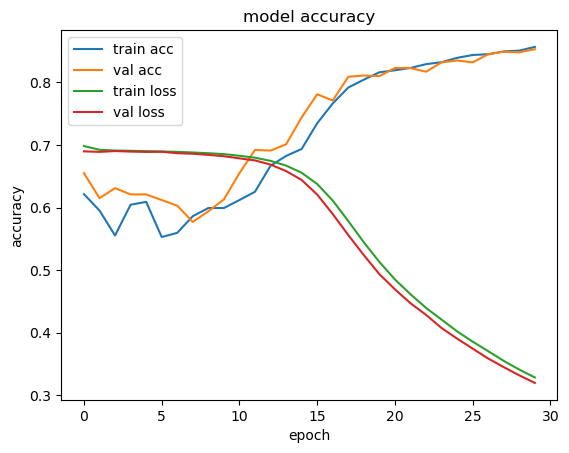

In [ ]:
plot_loss_acc(history)

In [ ]:
# smaller batch size --
model_test = Sequential()
model_test.add(Dense(units=10, activation='tanh', input_dim=3))
model_test.add(Dense(units=4, activation='tanh'))
model_test.add(Dense(units=2, activation='softmax'))

model_test.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] # matrix 就是之后打印用的，不会影响模型训练
              )

# Train the model, iterating on the data in batches of 64 samples
history2 = model_test.fit(data, labels, epochs=30, batch_size=64, validation_split=0.7)
plot_loss_acc(history2)


Epoch 1/30
47/47 [==============================] - 1s 12ms/step - loss: 0.7247 - accuracy: 0.5984 - val_loss: 0.6994 - val_accuracy: 0.6076
Epoch 2/30
47/47 [==============================] - 0s 8ms/step - loss: 0.6975 - accuracy: 0.5795 - val_loss: 0.6902 - val_accuracy: 0.5721
Epoch 3/30
47/47 [==============================] - 0s 9ms/step - loss: 0.6898 - accuracy: 0.5577 - val_loss: 0.6870 - val_accuracy: 0.5190
Epoch 4/30
47/47 [==============================] - 1s 11ms/step - loss: 0.6852 - accuracy: 0.5228 - val_loss: 0.6852 - val_accuracy: 0.5286
Epoch 5/30
47/47 [==============================] - 0s 9ms/step - loss: 0.6834 - accuracy: 0.5297 - val_loss: 0.6827 - val_accuracy: 0.5430
Epoch 6/30
47/47 [==============================] - 0s 8ms/step - loss: 0.6840 - accuracy: 0.5498 - val_loss: 0.6789 - val_accuracy: 0.5501
Epoch 7/30
47/47 [==============================] - 0s 10ms/step - loss: 0.6784 - accuracy: 0.5600 - val_loss: 0.6745 - val_accuracy: 0.5826
Epoch 8/30
47/47 

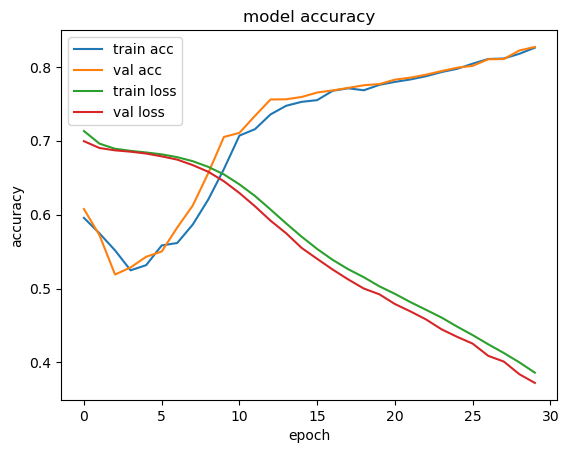

In [ ]:
# add hidden layer ++

model_test = Sequential()
model_test.add(Dense(units=10, activation='tanh', input_dim=3))
model_test.add(Dense(units=4, activation='tanh'))
model_test.add(Dense(units=3, activation='tanh'))
model_test.add(Dense(units=2, activation='softmax'))

model_test.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] 
              )

# Train the model, iterating on the data in batches of 64 samples
history2 = model_test.fit(data, labels, epochs=30, batch_size=64, validation_split=0.7)
plot_loss_acc(history2)


Epoch 1/30
47/47 [==============================] - 1s 16ms/step - loss: 0.6894 - accuracy: 0.5386 - val_loss: 0.6384 - val_accuracy: 0.6459
Epoch 2/30
47/47 [==============================] - 1s 14ms/step - loss: 0.6022 - accuracy: 0.6853 - val_loss: 0.6018 - val_accuracy: 0.6977
Epoch 3/30
47/47 [==============================] - 0s 6ms/step - loss: 0.5637 - accuracy: 0.7254 - val_loss: 0.4523 - val_accuracy: 0.7950
Epoch 4/30
47/47 [==============================] - 0s 7ms/step - loss: 0.3687 - accuracy: 0.8377 - val_loss: 0.2129 - val_accuracy: 0.9020
Epoch 5/30
47/47 [==============================] - 0s 5ms/step - loss: 0.2449 - accuracy: 0.8897 - val_loss: 0.2002 - val_accuracy: 0.8997
Epoch 6/30
47/47 [==============================] - 0s 6ms/step - loss: 0.2074 - accuracy: 0.9040 - val_loss: 0.1578 - val_accuracy: 0.9303
Epoch 7/30
47/47 [==============================] - 0s 6ms/step - loss: 0.1558 - accuracy: 0.9316 - val_loss: 0.2092 - val_accuracy: 0.9144
Epoch 8/30
47/47 [

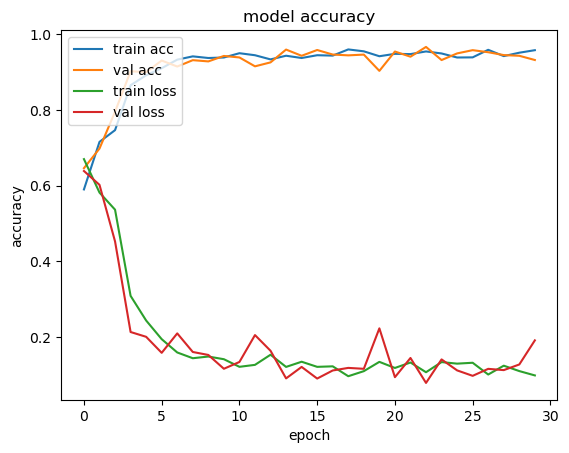

In [ ]:
# increase learning rate ++
from tensorflow import keras

model_test = Sequential()
model_test.add(Dense(units=10, activation='tanh', input_dim=3))
model_test.add(Dense(units=4, activation='tanh'))
model_test.add(Dense(units=2, activation='softmax'))

model_test.compile(optimizer=keras.optimizers.Adam(0.1),  # high learning rate
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] 
              )

# Train the model, iterating on the data in batches of 64 samples
history2 = model_test.fit(data, labels, epochs=30, batch_size=64, validation_split=0.7)
plot_loss_acc(history2)


## 3. Build a regression model

* Take the Boston housing dataset (http://lib.stat.cmu.edu/datasets/boston)
* Records a set of variables for a set of houses in Boston, including among others:
    * CRIM     per capita crime rate by town
    * ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    * INDUS    proportion of non-retail business acres per town
    * CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    * NOX      nitric oxides concentration (parts per 10 million)
    * RM       average number of rooms per dwelling
* Can we use these variables to predict the value of a house (in tens of thousands of dollars)?

In [ ]:
import tensorflow
from sklearn.preprocessing import StandardScaler 
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#This is how we load the dataset, pre-split in training/validation sets
(X_train, y_train), (X_val, y_val) = tensorflow.keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113)

#Let's have a look at the data
print(X_train.shape)
print(X_train[0], y_train[0])

# 标准化特征: 去除均值并缩放至单位方差
# u -- mean, s -- standard deviation
# z = (x - u) / s
scaler = StandardScaler()
scaler.fit(X_train) # calculate u,s
X_train_s = scaler.transform(X_train) # calculate z
X_val_s = scaler.transform(X_val) # calculate z
print(X_train_s.shape)
print(X_train_s[0], y_train[0])

# out puts are all positive
print('output >0: ',np.sum(y_train > 0),np.sum(y_val > 0))



(404, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2
(404, 13)
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ] 15.2
output >0:  404 102


In [ ]:
# regression model mae
model = Sequential()
model.add(Dense(10, activation="relu", input_dim=13))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(optimizer='adam',                    
              loss='mean_absolute_error', 
              metrics=["mean_absolute_error"]) 
print(model.optimizer.get_config())
model.summary()


{'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_70 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 5         
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# regression with StandardScaler
history_ = model.fit(X_train_s, y_train, batch_size=16, epochs=20, validation_data=(X_val_s, y_val))


Epoch 1/20
26/26 [==============================] - 1s 14ms/step - loss: 21.8313 - mean_absolute_error: 21.8313 - val_loss: 21.9631 - val_mean_absolute_error: 21.9631
Epoch 2/20
26/26 [==============================] - 0s 5ms/step - loss: 21.0116 - mean_absolute_error: 21.0116 - val_loss: 21.5323 - val_mean_absolute_error: 21.5323
Epoch 3/20
26/26 [==============================] - 0s 8ms/step - loss: 21.3903 - mean_absolute_error: 21.3903 - val_loss: 21.0115 - val_mean_absolute_error: 21.0115
Epoch 4/20
26/26 [==============================] - 0s 6ms/step - loss: 20.1529 - mean_absolute_error: 20.1529 - val_loss: 20.3528 - val_mean_absolute_error: 20.3528
Epoch 5/20
26/26 [==============================] - 0s 7ms/step - loss: 19.8989 - mean_absolute_error: 19.8989 - val_loss: 19.5404 - val_mean_absolute_error: 19.5404
Epoch 6/20
26/26 [==============================] - 0s 6ms/step - loss: 18.3172 - mean_absolute_error: 18.3172 - val_loss: 18.5732 - val_mean_absolute_error: 18.5732
Epo

In [ ]:
# regression without StandardScaler
history = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
26/26 [==============================] - 0s 12ms/step - loss: 517.7479 - mean_absolute_error: 517.7479 - val_loss: 245.7695 - val_mean_absolute_error: 245.7695
Epoch 2/20
26/26 [==============================] - 0s 13ms/step - loss: 89.3428 - mean_absolute_error: 89.3428 - val_loss: 12.7761 - val_mean_absolute_error: 12.7761
Epoch 3/20
26/26 [==============================] - 0s 8ms/step - loss: 8.6166 - mean_absolute_error: 8.6166 - val_loss: 7.2786 - val_mean_absolute_error: 7.2786
Epoch 4/20
26/26 [==============================] - 1s 25ms/step - loss: 6.8906 - mean_absolute_error: 6.8906 - val_loss: 6.7931 - val_mean_absolute_error: 6.7931
Epoch 5/20
26/26 [==============================] - 0s 6ms/step - loss: 6.6534 - mean_absolute_error: 6.6534 - val_loss: 6.6460 - val_mean_absolute_error: 6.6460
Epoch 6/20
26/26 [==============================] - 0s 6ms/step - loss: 6.5301 - mean_absolute_error: 6.5301 - val_loss: 6.6098 - val_mean_absolute_error: 6.6098
Epoch 7/20
26

In [ ]:
# regression model mse
model = Sequential()
model.add(Dense(10, activation="relu", input_dim=13))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(optimizer='adam',                    
              loss='mean_squared_error', 
              metrics=["mean_squared_error"]) 
print(model.optimizer.get_config())
model.summary()


{'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_79 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 5         
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
26/26 [==============================] - 1s 11ms/step - loss: 2802.7696 - mean_squared_error: 2802.7696 - val_loss: 1413.5956 - val_mean_squared_error: 1413.5956
Epoch 2/20
26/26 [==============================] - 0s 5ms/step - loss: 1182.2159 - mean_squared_error: 1182.2159 - val_loss: 805.5633 - val_mean_squared_error: 805.5633
Epoch 3/20
26/26 [==============================] - 0s 6ms/step - loss: 737.6717 - mean_squared_error: 737.6717 - val_loss: 541.1505 - val_mean_squared_error: 541.1505
Epoch 4/20
26/26 [==============================] - 0s 8ms/step - loss: 559.4972 - mean_squared_error: 559.4972 - val_loss: 361.3703 - val_mean_squared_error: 361.3703
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 404.2645 - mean_squared_error: 404.2645 - val_loss: 248.3234 - val_mean_squared_error: 248.3234
Epoch 6/20
26/26 [==============================] - 0s 7ms/step - loss: 253.2945 - mean_squared_error: 253.2945 - val_loss: 186.5546 - val_mean_squared_e

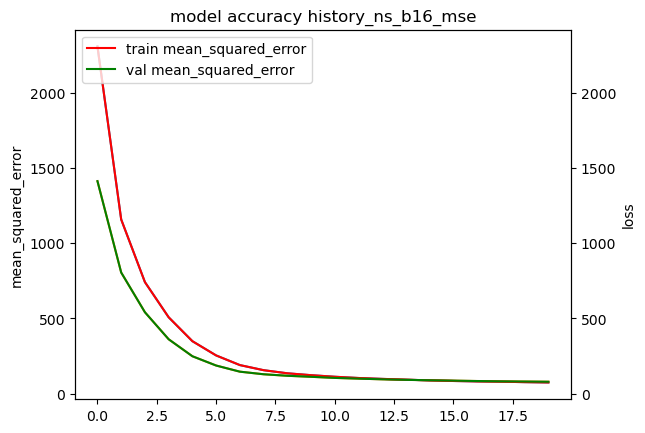

In [ ]:
# regression without StandardScaler
history_ns_b16_mse = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_val, y_val))
plot_loss_mae(history_ns_b16_mse, "mean_squared_error",'history_ns_b16_mse')

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_49 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 5         
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
51/51 [==============================] - 1s 9ms/step - loss: 58.3469 - mean_absolute_error: 58.3469 - val_loss: 17.7111 - val_mean_absolute_error: 17.7111
Epoch 2/20
51/51 [==============================] - 0s 6ms/step - loss: 17.5593 - mean_absolute_error: 17.5593 - val_loss: 14.6248 - val_mean_absolute_error: 14.6248
Epoch 3/20
51/51 [==============================] - 2

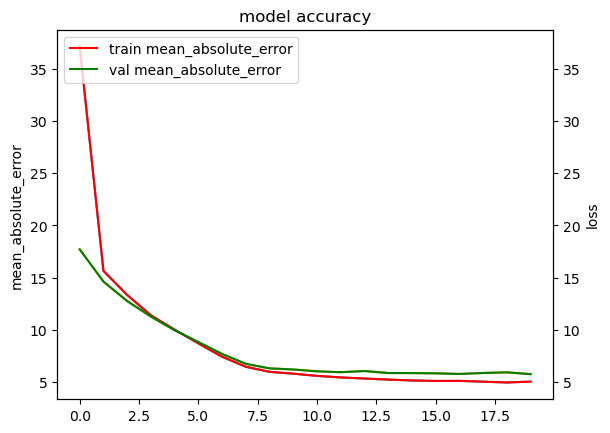

In [ ]:
# adjust batch size
# batch size should match with learning rate
model_r = Sequential()
model_r.add(Dense(10, activation="relu", input_dim=13))
model_r.add(Dense(4, activation="relu"))
model_r.add(Dense(1, activation=None))

model_r.compile(optimizer='adam',                    # adaptive learning rate method
              loss='mean_absolute_error', metrics=["mean_absolute_error"]) 
model_r.summary()

history3 = model_r.fit(X_train, y_train, batch_size=8, epochs=20, validation_data=(X_val, y_val))
plot_loss_mae(history3, "mean_absolute_error")

## 4. The IMDB movie review sentiment dataset

Another pre-package toy dataset from Keras. Contains 25k reviews for a movies in IMDB, you want to predict whether the review is positive or negative.

> each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

https://keras.io/api/datasets/imdb/

Load the dataset, set a couple of important parameters (max_features, maxlen). Also pad all reviews with less than 200 words so that they have all the same length.

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen, padding="post")
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen, padding="post")


25000 Training sequences
25000 Validation sequences


Since the dataset is pre-processed so that each word is represented by an integer, we have to build a reverse dictionary if we want to actually read some of the reviews:

In [ ]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)

inverted_word_index[0] = ""
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset


In [ ]:
print([i for i in x_train[2]])

In [ ]:
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[2])
print(decoded_sequence)

How do we build a predictor for this task?

In [ ]:
model = Sequential()
...

## 4. The IMDB movie review sentiment dataset

Another pre-package toy dataset from Keras. Contains 25k reviews for a movies in IMDB, you want to predict whether the review is positive or negative.

> each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

https://keras.io/api/datasets/imdb/

Load the dataset, set a couple of important parameters (max_features, maxlen). Also pad all reviews with less than 200 words so that they have all the same length.

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen, padding="post")
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen, padding="post")


25000 Training sequences
25000 Validation sequences


Since the dataset is pre-processed so that each word is represented by an integer, we have to build a reverse dictionary if we want to actually read some of the reviews:

In [ ]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)

inverted_word_index[0] = ""
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset


In [ ]:
print([i for i in x_train[2]])

In [ ]:
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[2])
print(decoded_sequence)

How do we build a predictor for this task?

In [ ]:
model = Sequential()
...